In [1]:
import calculate_return as cr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import sharpe
from scipy.stats import jarque_bera 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

In [2]:
# Fetching baseline data
ports = cr.fetch_returns('garch', range(10000))

In [2]:
ports_1000 = cr.fetch_returns('garch', range(1000))

In [6]:
sharpe.CE_ports(ports, risk_premium = True)

,dual_phase,single_phase,100,9050
Certainty Equivalent,102.258,87.756,132.681,50.127


In [27]:
CE_data = ports[["dual_phase","single_phase","100","9050"]]
max_date = max(ports.index.levels[1])
CE_data = CE_data.loc[(slice(None), max_date),:].reset_index()
CE_data = CE_data.drop(["period"], axis=1).set_index("random_state")

In [28]:
CE_list = []
for strategy in ['dual_phase', 'single_phase', '100', '9050']:
    input_list=CE_data[strategy][abs(CE_data[strategy]) > 10000].to_list()
    len_list = len(input_list)
    CE_val = (1/len_list)**(1/(1-2))*sum([(x)**(1-2) for x in input_list])**(1/(1-2))
    CE_list.append(pd.DataFrame([CE_val], columns=[strategy]))

CE_list = pd.concat(CE_list, axis=1)
CE_list.index = pd.Index(['Certainty Equivalent'])

In [31]:
(CE_data.mean()/CE_list-1)*100

,dual_phase,single_phase,100,9050
Certainty Equivalent,102.258,87.756,132.681,50.127


In [38]:
CE_list

,dual_phase,single_phase,100,9050
Certainty Equivalent,1828156.107,1896823.990,1351046.578,1593942.760


In [52]:
import datetime as dt

(18262.0, 25567.0)

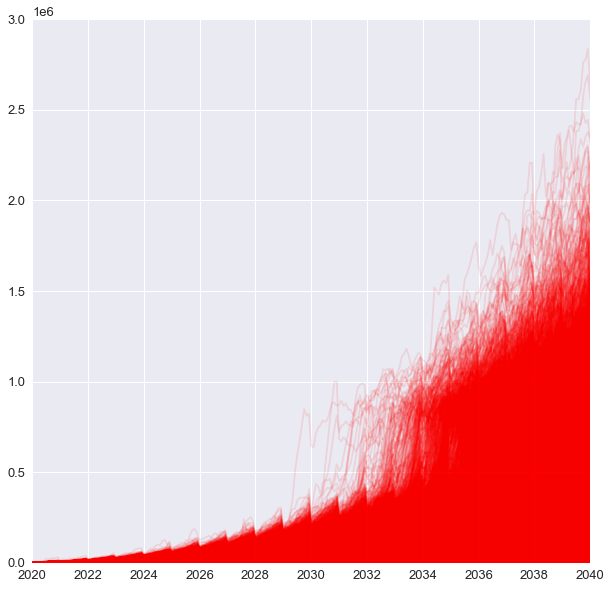

In [55]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot(ports.reset_index(level=0).pivot(columns = 'random_state', values='dual_phase'), color='red', alpha=0.1)
ax.set_ylim(0, 0.1e7)
ax.set_xlim(dt.date(2020, 1, 1), dt.date(2040, 1, 1))

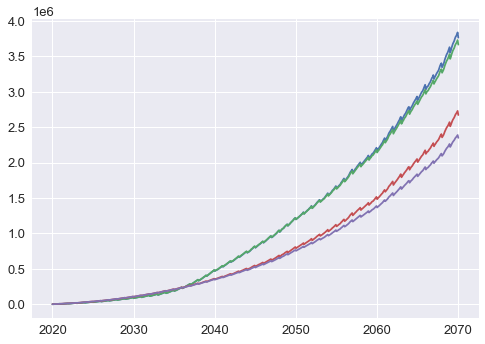

In [3]:
plt.plot(ports.groupby(level=1).mean().loc[:, ['dual_phase', 'single_phase', '100', '9050']])

In [7]:
sharpe_ratio = sharpe.calculate_sharpe(ports)

6010000
5965121


In [6]:
sharpe_ratio.std()

Dual phase     0.090
Single phase   0.090
100% stocks    0.088
Life cycle     0.092
dtype: float64

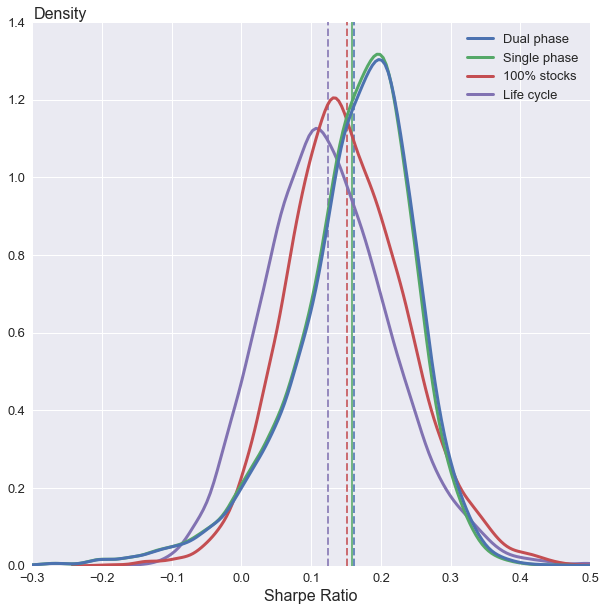

In [23]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.kdeplot(data = sharpe_ratio, linewidth = 3)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_ylabel("Density", loc='top', rotation=0, labelpad=-80)
ax.set_xlabel("Sharpe Ratio")
ax.set_ylim(0, 1.4)
ax.set_xlim(-0.3, 0.5)
for i, strategy in enumerate(['Dual phase', 'Single phase', '100% stocks', 'Life cycle']):
    if strategy == "Single phase":
        ax.vlines(sharpe_ratio[strategy].mean(), ymin= 0, ymax=1.4, color = cycle[i], linestyle="solid", alpha = 0.8, linewidth = 2)
    else:
        ax.vlines(sharpe_ratio[strategy].mean(), ymin= 0, ymax=1.4, color = cycle[i], linestyle="--", alpha = 0.8, linewidth = 2)
f.savefig("Empirical/sharpe_distribution.png", bbox_inches = 'tight', pad_inches = 0.1)

### Removing defaulted investors

In [12]:
zz = ports.loc[(slice(None), '2070-01-01'),:]
zzz = zz[zz['tv_u'] > 0].reset_index()
non_defaulted=zzz['random_state'].tolist()
non_defaulted_df=ports.loc[non_defaulted,:]


In [16]:
sharpe_ratio_no_def = sharpe.calculate_sharpe(non_defaulted_df)

<AxesSubplot:ylabel='Density'>

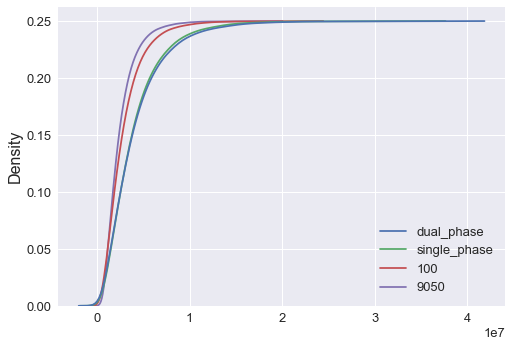

In [33]:
sns.kdeplot(data = ports.loc[(slice(None), '2070-01-01'), ['dual_phase', 'single_phase', '100', '9050']], clip=(-1e7, 5e7), cumulative=True)

In [33]:
ports.loc[(slice(None), '2070-01-01'), ['dual_phase', 'single_phase', '100', '9050']].describe()

NameError: name 'sharpe_ratios' is not defined

In [54]:
df = ports
df['total_return_dual_phase'] = df.groupby(level=0, as_index=False).apply(lambda x: x.dual_phase/x.savings.cumsum()).reset_index(level=0, drop=True)

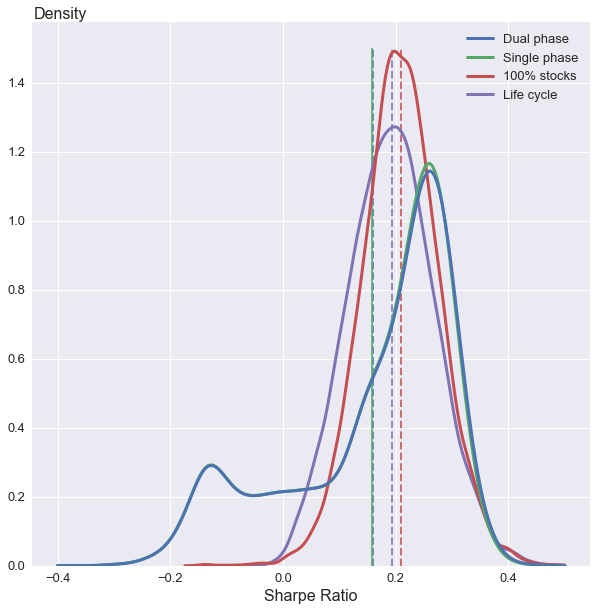

In [17]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.kdeplot(data = sharpe_ratio_no_def, linewidth = 3, clip= (-0.4, 0.5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_ylabel("Density", loc='top', rotation=0, labelpad=-80)
ax.set_xlabel("Sharpe Ratio")
for i, strategy in enumerate(['Dual phase', 'Single phase', '100% stocks', 'Life cycle']):
    if strategy == "Single phase":
        ax.vlines(sharpe_ratio_no_def[strategy].mean(), ymin= 0, ymax=1.5, color = cycle[i], linestyle="solid", alpha = 0.8, linewidth = 2)
    else:
        ax.vlines(sharpe_ratio_no_def[strategy].mean(), ymin= 0, ymax=1.5, color = cycle[i], linestyle="--", alpha = 0.8, linewidth = 2)
#f.savefig("Empirical/sharpe_distribution.png", bbox_inches = 'tight', pad_inches = 0.1)

In [9]:
ports.loc[(slice(None), '2070-01-01'), ['dual_phase', 'single_phase']].describe()

,dual_phase,single_phase
count,10000.000,10000.000
mean,3838926.962,3733564.218
std,3351444.133,3102507.092
min,-374386.645,-374386.645
25%,1578737.465,1619016.953
50%,3005684.776,2996312.394
75%,5058007.315,4923403.961
max,40273208.896,36180303.103


In [7]:
sharpe_ratio.describe()

,Dual phase,Single phase,100% stocks,Life cycle
count,9939.000,9939.000,9939.000,9939.000
mean,0.161,0.159,0.152,0.124
std,0.090,0.090,0.088,0.092
min,-0.331,-0.331,-0.201,-0.152
25%,0.115,0.113,0.093,0.061
50%,0.174,0.171,0.146,0.119
75%,0.222,0.218,0.208,0.182
max,0.478,0.467,0.516,0.766


In [91]:
ports.loc[(1, slice(None)), :].savings.cumsum().max()

832764

In [212]:
cum_savings = ports.loc[(1, slice(None)), :].savings.cumsum().max()

In [139]:
ports['100']/ports.loc[(slice(None), '2070-01-01'), '100'].groupby(level=0).mean()

random_state  period    
0             2020-01-01   0.001
              2020-02-01   0.001
              2020-03-01   0.002
              2020-04-01   0.003
              2020-05-01   0.004
                            ... 
399           2069-09-01   1.012
              2069-10-01   0.885
              2069-11-01   0.975
              2069-12-01   0.986
              2070-01-01   1.000
Name: 100, Length: 240400, dtype: float64

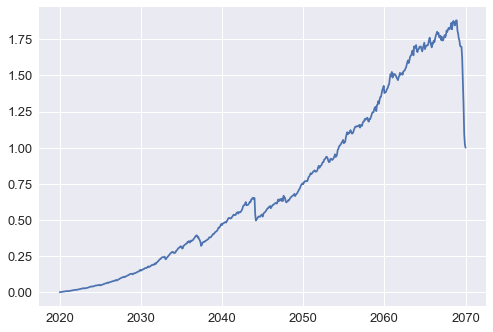

In [213]:
plt.plot((ports['100']/ports.loc[(slice(None), '2070-01-01'), '100'].groupby(level=0).mean()).groupby(level=1).mean())

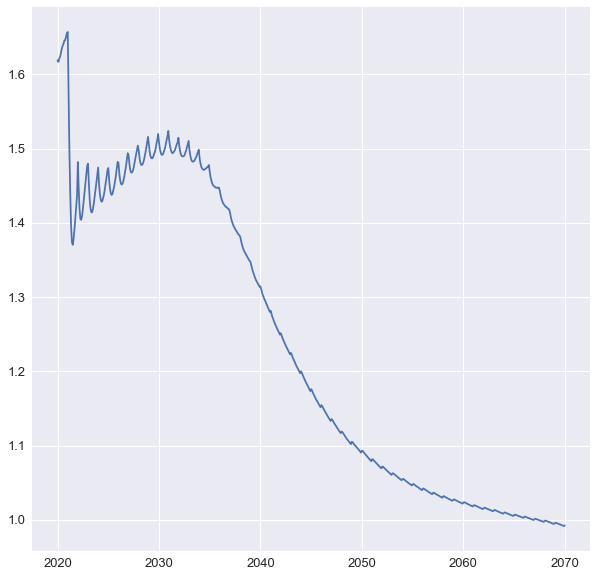

In [306]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot((ports.pv_u/ports.pv_u.groupby(level=0).max()).groupby(level=1).mean()/(ports['100']/ports['100'].groupby(level=0).max()).groupby(level=1).mean())
#ax.plot((ports.pv_u/ports.pv_u.groupby(level=0).max()).groupby(level=1).mean())
#ax.plot((ports['100']/ports['100'].groupby(level=0).max()).groupby(level=1).mean())

In [24]:
limit = 250000

In [25]:
ports['end_pv_u'] = ports.groupby(level=0).take([-1])[['dual_phase']].reset_index(level=0, drop=True)

In [26]:
ports.end_pv_u = ports.end_pv_u.bfill()

In [27]:
ports['end_100'] = ports.groupby(level=0).take([-1])[['100']].reset_index(level=0, drop=True)

In [28]:
ports.end_100 = ports.end_100.bfill()

In [29]:
ports = ports[ports['end_pv_u'].abs() > limit]
ports = ports[ports['end_100'].abs() > limit]

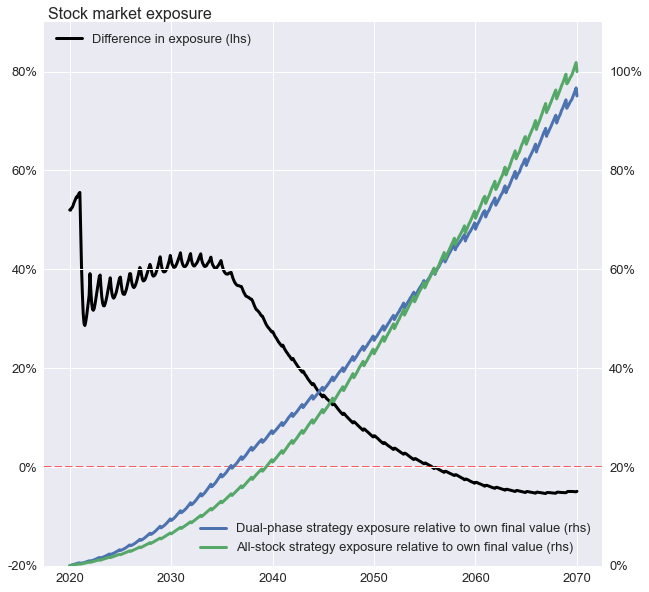

In [31]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot((ports['pv_u']*100/ports['end_pv_u']).groupby(level=1).mean()/(ports['100']/ports['end_100']).groupby(level=1).mean()-100, color='black', linewidth = 3)
ax2 = ax.twinx()
ax2.plot((ports['pv_u']*100/ports['end_pv_u']).groupby(level=1).mean(), linewidth = 3)
ax2.plot((ports['100']*100/ports['end_100']).groupby(level=1).mean(), linewidth = 3)
ax.set_ylim(-20, 90)
ax2.set_ylim(0, 110)
ax.axhline(0, color = 'red', linestyle='dashed', linewidth=2, alpha = .6)
ax.set_ylabel("Stock market exposure", rotation=0, loc='top', labelpad=-205) 
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.legend(['Dual-phase strategy exposure relative to own final value (rhs)', 'All-stock strategy exposure relative to own final value (rhs)'], loc='lower right')
ax.legend(['Difference in exposure (lhs)'], loc='upper left')
f.savefig('Empirical/stock_market_exposure.png', bbox_inches = 'tight', pad_inches = 0.1)

### Testing for normality

#### Sharpe ratio

In [4]:
sharpe_ratio = sharpe.calculate_sharpe(ports)

In [8]:
ports['total_return_dual_phase'] = ports.groupby(level=0, as_index=False).apply(lambda x: x.dual_phase/x.savings.cumsum()).reset_index(level=0, drop=True).pct_change().fillna(0)

In [10]:
no_ex = ports[ports.total_return_dual_phase.abs() < 1] 

In [11]:
jarque_bera(no_ex.total_return_dual_phase.values)

Jarque_beraResult(statistic=64257167.453091465, pvalue=0.0)

<AxesSubplot:xlabel='total_return_dual_phase', ylabel='Density'>

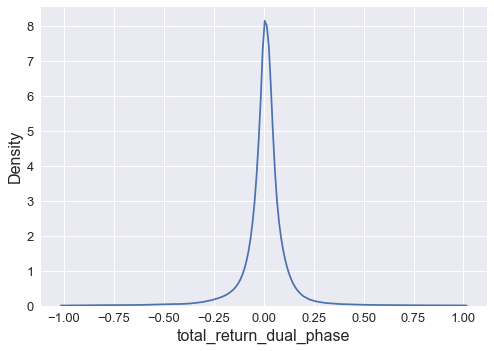

In [13]:
sns.kdeplot(data = no_ex.total_return_dual_phase)

In [5]:
jarque_bera(sharpe_ratio.iloc[:, 0].values)

Jarque_beraResult(statistic=2710.588149742223, pvalue=0.0)

#### Terminal wealth

In [6]:
jarque_bera(ports.loc[(slice(None), '2070-01-01'), ['dual_phase']].values)

Jarque_beraResult(statistic=60945.508411693336, pvalue=0.0)

In [ ]:
jarque_bera